<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


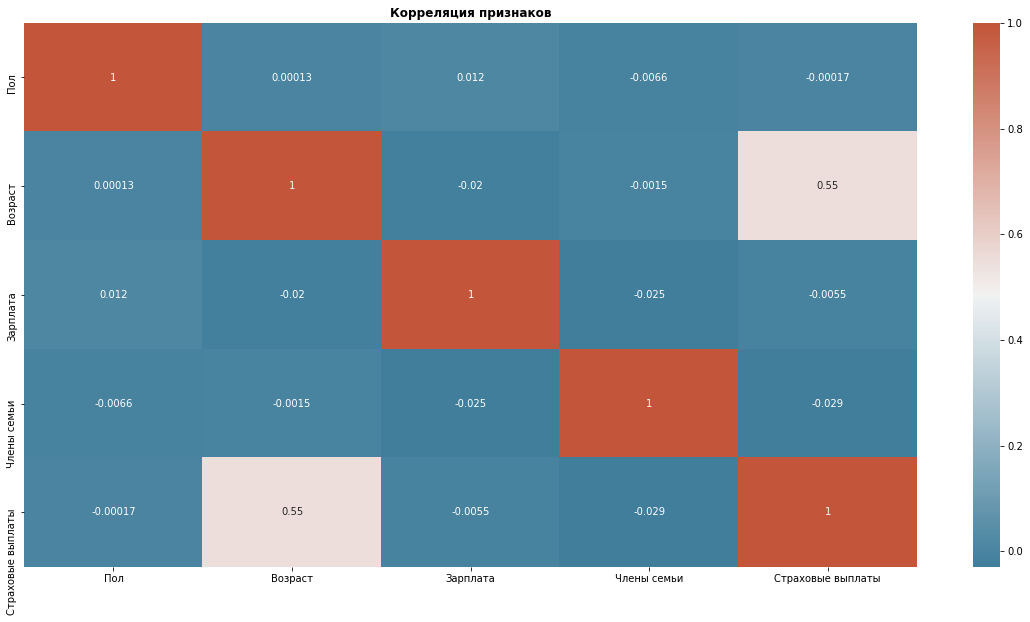

In [4]:
plt.figure(figsize=(20, 10))
plt.title('Корреляция признаков', weight = 'bold')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(method='spearman'), annot = True, cmap=cmap)
plt.show()

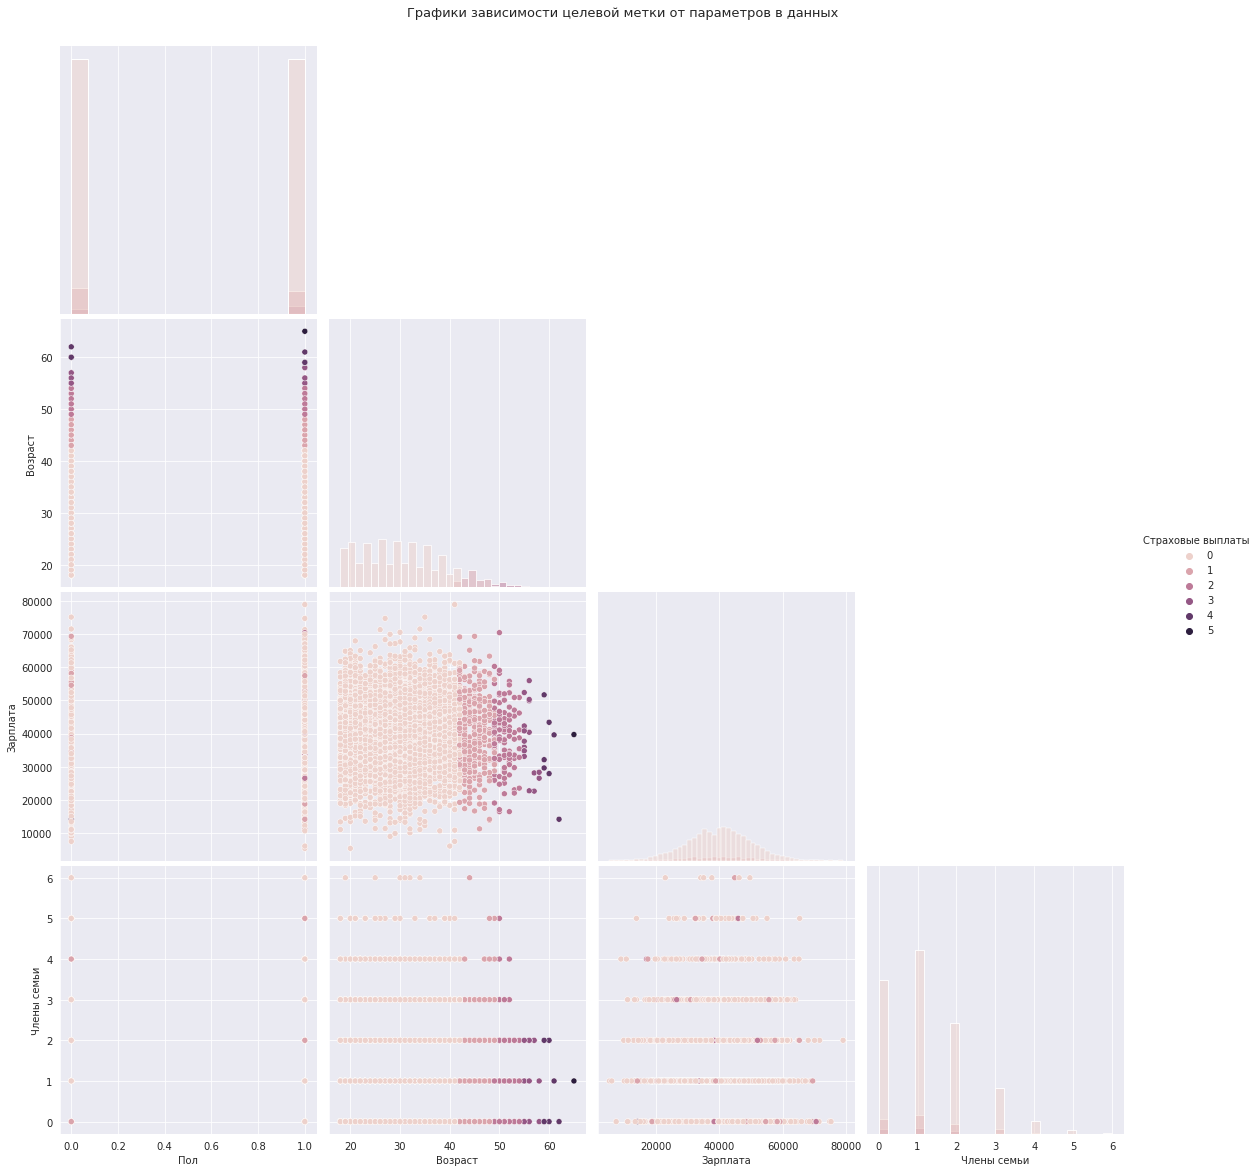

In [5]:
sns.set_style('darkgrid')
sns.pairplot(data, hue ='Страховые выплаты',
             height = 4,
             corner = True,
             diag_kind = 'hist')
plt.suptitle("Графики зависимости целевой метки от параметров в данных", y = 1.02, fontsize = 13)
plt.show()

In [6]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [7]:
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size = 0.25,
                                                                            random_state = 254)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Создадим модель по исходным формулам для предсказания значений по неизменённым признакам

In [8]:
class LinearRegressor_my:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [9]:
model = LinearRegressor_my()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)
MSE = mean_squared_error(predict, test_target)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.42
MSE: 0.11


Вычислим значения R2 и MSE для предсказанных значений по исходным (неизменённым данным)

In [10]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions = model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2_score Линейной регрессии неизменённой матрицы: 0.42
MSE Линейной регрессии неизменённой матрицы: 0.11


График зависимости значений истинные/предсказанные модели линейной регрессии из Scikit-learn

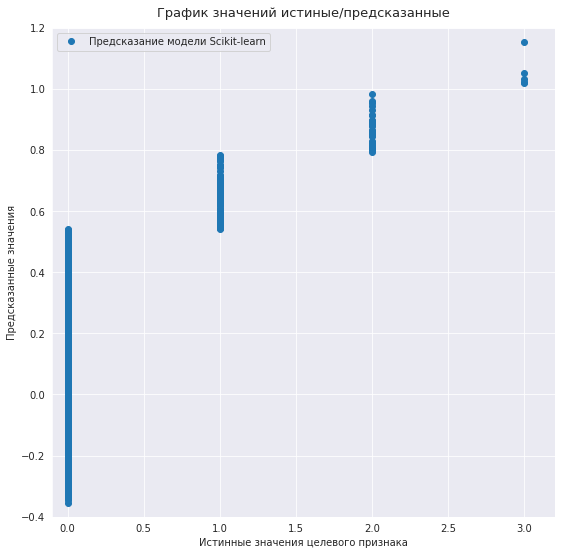

In [11]:
plt.figure(figsize=(9,9))
plt.plot(test_target, predictions,'o', alpha = 1)
plt.legend(['Предсказание модели Scikit-learn'])
plt.xlim(-0.1, 3.2)
plt.ylim(-0.4, 1.2)
plt.title('График значений истиные/предсказанные', y = 1.01, fontsize = 13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу

In [12]:
matrix = np.random.normal(3, size = (4,4))
np.linalg.inv(matrix)

array([[-0.37595102,  0.49108725,  0.12324037, -0.22910038],
       [ 0.24635675, -0.27422614, -0.70597154,  0.64777904],
       [-0.00303472,  0.40436632,  0.31474329, -0.58757437],
       [ 0.06748245, -0.27701305,  0.32945864,  0.0903041 ]])

Произведём умножение признаков на произвольную матрицу

In [13]:
train_matrix = train_features.dot(matrix)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
883,73785.612953,67401.071038,71389.087799,168217.277506
4736,93337.906579,85288.321962,90323.680052,212710.638982
4455,77561.303664,70859.409714,75047.331701,176791.232182
3993,93065.761364,85013.513010,90046.077962,212185.247912
651,76268.551072,69683.139210,73793.915827,173827.005903


In [14]:
test_matrix = test_features.dot(matrix)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,71221.247789,65079.590093,68921.691026,162309.799729
4959,64703.411412,59132.802487,62611.820368,147409.559743
1728,70819.560643,64701.342577,68526.291676,161420.223370
4169,82224.776187,75113.711905,79556.365835,187443.555526
1984,83581.872678,76366.996942,80873.411182,190487.953791


In [15]:
model_t = LinearRegression()
model_t.fit(train_matrix,train_target)
predictions_t= model_t.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions_t).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_t,test_target).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.11


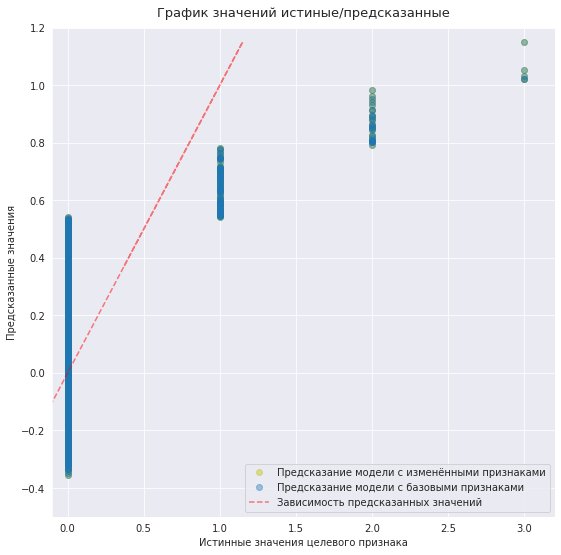

In [16]:
plt.figure(figsize = (9,9))
plt.plot(test_target, predictions_t,'yo', alpha = 0.4)
plt.plot(test_target, predictions,'o', alpha = 0.4)
plt.plot(predictions_t,predictions,'r--', alpha = 0.5)
plt.legend(['Предсказание модели c изменёнными признаками',
            'Предсказание модели c базовыми признаками',
            'Зависимость предсказанных значений'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.5,1.2)
plt.title('График значений истиные/предсказанные', y = 1.01, fontsize = 13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

**Ответ:** Если признаки исходных данных умножить на обратимую матрицу, то качество линейной регрессии не изменится

**Обоснование:** Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится.

## Алгоритм преобразования

**Алгоритм**

Умножение матрицы на матрицу возможно, если ширина первой матрицы А (mn) равна высоте второй матрицы P (nr). Тогда размер произведения этих матриц будет (mr). Размерность n «cхлопывается».

При умножении признаков выборки A размерностью (3750, 4) на обратимую произвольную матрицу P размерностью (4, 4), результатом получаем новый (изменённый) набор данных скалярных произведений M размернотью (3750, 4)

Формула выглядит следующим образом: $$ Mij = (Ai, Bj) $$

В каждую новую ячейку записывается результат сложения произведений строки i на столбец j. Так например в первой ячейке новой таблицы будет записан результат по этой формуле: $$ M11 = A11P11 + A12P21 + ... $$

Далее вычисляется важный параметр - вектор w по формуле:
$$ w = (X^TX)^{-1}X^Ty $$

В которой X таблица признков, где нулевой столбец заполнен 1 (единицами), а y - вектор целевого признака $$ Xi = (Mi2Mi3Mi4Mi5) $$

В Линейной регрессии предсказания вычисляются по формуле:
$$ a = Xw + w0 $$
$$ w = (X^TX)^{−1}X^Ty $$
где w0 - значение нулевого аргумента вектора, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения MSE.

Если использовать формулу линейной регрессии:
$$ a = Xw $$
$$ w = (X^TX)^{−1}X^Ty $$
то, при умножжении признаков на обратимую матрицу, формула примет вид:
$$ a′ = X′w′ = (XP)w′ $$
$$ w′ = ((XP)^T(XP))^{−1}(XP)^Ty $$

где P — случайная обратимая матрица. Преобразуем форумлу:

$$ w′ = (X′^TX')^{−1}X′^Ty = ((XP)^T(XP))^{−1}(XP)^Ty = (P^TX^TXP)^{−1}P^TX^Ty = P^{−1}(X^TX)^{−1}(P^T)^{−1}P^TX^Ty = P^{−1}(X^TX)^{−1}EX^Ty = P^{−1}(X^TX)^{−1}X^Ty = P^{−1}w $$

Т.к. w′≠w, то и a′≠a, однако, если w′ можно выразить через P и w, то и a′ можно выразить через X,P и w:

$$ a′ = X′w′ = (XP)P^{−1}w = XPP^{−1}w = Xw $$

Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что $a = a{'}$

**Обоснование**

Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. 

## Проверка алгоритма

In [17]:
P = np.random.normal(3, size = (4,4))
np.linalg.inv(P)

array([[-0.15128684, -0.1895279 ,  0.21729467,  0.34788251],
       [-0.39608771,  0.57640629, -0.14535133,  0.08848074],
       [ 0.52076725,  0.24259464, -0.76183367, -0.06815862],
       [ 0.19394393, -0.72499388,  0.88726666, -0.36664445]])

Выполним умножение признаков на нашу новую матрицу и обозначим её M

In [18]:
M = train_features.dot(P)
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
883,123774.508283,165991.761524,111256.147830,136813.730630
4736,156511.428881,209927.770779,140707.744672,173003.321186
4455,130082.226124,174464.370211,116935.543629,143787.537603
3993,156127.605390,209375.991526,140336.052528,172575.077168
651,127902.188932,171533.574283,114974.105928,141368.226699


In [19]:
test_M = test_features.dot(P)
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,119427.182072,160185.216038,107367.593162,132010.473208
4959,108462.791850,145482.940481,97514.779628,119882.555713
1728,118771.721153,159300.644493,106771.280412,131288.664708
4169,137920.782798,184968.826762,123975.710057,152451.219358
1984,140160.428039,187982.598937,125998.371576,154922.093751


Далее в нулевой столбец нашей изменённой таблицы вносим значение 1

In [20]:
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,123774.508283,165991.761524,111256.147830,136813.730630
1,1.0,156511.428881,209927.770779,140707.744672,173003.321186
2,1.0,130082.226124,174464.370211,116935.543629,143787.537603
3,1.0,156127.605390,209375.991526,140336.052528,172575.077168
4,1.0,127902.188932,171533.574283,114974.105928,141368.226699


Присвоим переменной у, целевые признаки и вычислим по формуле $(w = (X^{T} * X)^{-1} * X^{T} * y)$

In [21]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

In [22]:
a = test_M.dot(w[1:]) + w[0]

In [23]:
R2_score_m = r2_score(test_target, a)
MSE_m = mean_squared_error(a, test_target)
print("R2_score:", R2_score_m.round(2))
print("MSE:", MSE_m.round(2))

R2_score: 0.42
MSE: 0.11


Изобразим на графике предсказанные значения относительно истинных значений целевого столбца и сравним эти значения с предсказаниями модели по неизменённым признакам

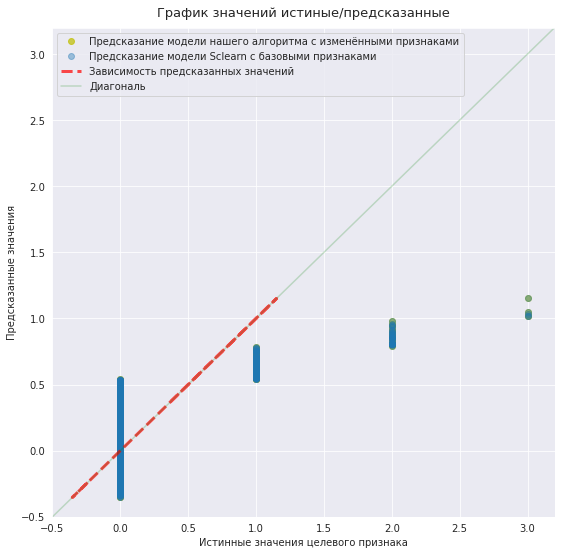

In [24]:
plt.figure(figsize = (9,9))
plt.plot(test_target, a, 'yo', alpha = 0.7)
plt.plot(test_target, predictions, 'o', alpha = 0.4)
plt.plot(a,predictions, 'r--', alpha = 0.7, linewidth = 3)
plt.plot([-0.5,3.2], [-0.5,3.2], linestyle = '-', color = 'g', alpha = 0.2)
plt.legend(['Предсказание модели нашего алгоритма c изменёнными признаками',
            'Предсказание модели Sclearn c базовыми признаками',
            'Зависимость предсказанных значений','Диагональ'])

plt.xlim(-0.5, 3.2)
plt.ylim(-0.5, 3.2)
plt.title('График значений истиные/предсказанные', y = 1.01, fontsize = 13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Сравнение R2 и MSE изменённой/неизменённой матрицы признаков

In [25]:
comparison_tabl = pd.DataFrame(index = ['R2_score','MSE'], columns = ['Изменённая матрица', 'Неизменённая матрица'])
comparison_tabl['Изменённая матрица'] = R2_score_m, MSE_m
comparison_tabl['Неизменённая матрица'] = R2_score_l, MSE_l

comparison_tabl.T

,R2_score,MSE
Изменённая матрица,0.416687,0.112489
Неизменённая матрица,0.416687,0.112489
